<a href="https://colab.research.google.com/github/sontt22791/pytorch-real-world-project/blob/main/2_simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
np.random.seed(42)
torch.manual_seed(42)

In [ ]:
!gdown --id 1V2M5bObcHrLajWAdTvKYMr_V6-A3X408

Downloading...
From: https://drive.google.com/uc?id=1V2M5bObcHrLajWAdTvKYMr_V6-A3X408
To: /content/weatherAUS.csv
14.1MB [00:00, 124MB/s]


In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
cols = ['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']
df = df[cols]

df.RainToday.replace({'No':0, 'Yes':1}, inplace=True)
df.RainTomorrow.replace({'No':0, 'Yes':1}, inplace=True)

df = df.dropna(how='any')

X = df[['Rainfall', 'Humidity3pm', 'RainToday', 'Pressure9am']]
y = df[['RainTomorrow']]

In [ ]:
X.shape, y.shape

((124689, 4), (124689, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((99751, 4), (24938, 4))

In [ ]:
X_train.values

array([[0.0000e+00, 4.0000e+01, 0.0000e+00, 1.0082e+03],
       [1.6000e+00, 6.1000e+01, 1.0000e+00, 1.0137e+03],
       [0.0000e+00, 6.7000e+01, 0.0000e+00, 1.0160e+03],
       ...,
       [0.0000e+00, 7.2000e+01, 0.0000e+00, 1.0254e+03],
       [8.0000e+00, 5.9000e+01, 1.0000e+00, 1.0173e+03],
       [9.8000e+00, 7.5000e+01, 1.0000e+00, 1.0094e+03]])

In [ ]:
X_train.to_numpy()

array([[0.0000e+00, 4.0000e+01, 0.0000e+00, 1.0082e+03],
       [1.6000e+00, 6.1000e+01, 1.0000e+00, 1.0137e+03],
       [0.0000e+00, 6.7000e+01, 0.0000e+00, 1.0160e+03],
       ...,
       [0.0000e+00, 7.2000e+01, 0.0000e+00, 1.0254e+03],
       [8.0000e+00, 5.9000e+01, 1.0000e+00, 1.0173e+03],
       [9.8000e+00, 7.5000e+01, 1.0000e+00, 1.0094e+03]])

In [ ]:
X_train = torch.from_numpy(X_train.values).float()
y_train = torch.squeeze(torch.from_numpy(y_train.values)).float()

X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

In [ ]:
X_train, X_test

(tensor([[0.0000e+00, 4.0000e+01, 0.0000e+00, 1.0082e+03],
         [1.6000e+00, 6.1000e+01, 1.0000e+00, 1.0137e+03],
         [0.0000e+00, 6.7000e+01, 0.0000e+00, 1.0160e+03],
         ...,
         [0.0000e+00, 7.2000e+01, 0.0000e+00, 1.0254e+03],
         [8.0000e+00, 5.9000e+01, 1.0000e+00, 1.0173e+03],
         [9.8000e+00, 7.5000e+01, 1.0000e+00, 1.0094e+03]]),
 tensor([[   0.0000,   30.0000,    0.0000, 1017.5000],
         [   0.0000,   40.0000,    0.0000, 1037.2000],
         [   0.0000,   49.0000,    0.0000, 1017.3000],
         ...,
         [   0.0000,   70.0000,    0.0000, 1025.7000],
         [   0.0000,   70.0000,    0.0000, 1012.1000],
         [   0.0000,   64.0000,    0.0000, 1019.9000]]))

In [ ]:
class Net(nn.Module):
    def __init__(self, n_feature):
        super().__init__()
        self.fc1 = nn.Linear(n_feature, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [ ]:
net = Net(X_train.shape[1])

In [ ]:
loss = nn.BCELoss()

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
net = net.to(device)
loss = loss.to(device)

In [ ]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

In [ ]:
def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

In [ ]:
for epoch in range(1000):
    
    y_pred = net(X_train)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = loss(y_pred, y_train)
    
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)

      y_test_pred = net(X_test)
      y_test_pred = torch.squeeze(y_test_pred)

      test_loss = loss(y_test_pred, y_test)

      test_acc = calculate_accuracy(y_test, y_test_pred)
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

epoch 0
Train set - loss: 5.419, accuracy: 0.779
Test  set - loss: 5.427, accuracy: 0.778

epoch 100
Train set - loss: 0.433, accuracy: 0.809
Test  set - loss: 0.432, accuracy: 0.81

epoch 200
Train set - loss: 0.412, accuracy: 0.83
Test  set - loss: 0.412, accuracy: 0.83

epoch 300
Train set - loss: 0.407, accuracy: 0.832
Test  set - loss: 0.408, accuracy: 0.834

epoch 400
Train set - loss: 0.406, accuracy: 0.834
Test  set - loss: 0.406, accuracy: 0.834

epoch 500
Train set - loss: 0.405, accuracy: 0.834
Test  set - loss: 0.406, accuracy: 0.835

epoch 600
Train set - loss: 0.405, accuracy: 0.834
Test  set - loss: 0.405, accuracy: 0.835

epoch 700
Train set - loss: 0.405, accuracy: 0.834
Test  set - loss: 0.405, accuracy: 0.836

epoch 800
Train set - loss: 0.404, accuracy: 0.834
Test  set - loss: 0.404, accuracy: 0.836

epoch 900
Train set - loss: 0.404, accuracy: 0.834
Test  set - loss: 0.404, accuracy: 0.836



# normalize
ở trên tác giả k normalize trước khi train, đây gần như là điều bắt buộc vs nn, nhưng ở trên vẫn hội tụ đc. mình k nhớ chính xác có fai do Adam k cần normalize ko

In [ ]:
from sklearn.preprocessing import StandardScaler


std = StandardScaler()
X_train_std = std.fit_transform(X_train)

X_test_std = std.transform(X_test)

In [ ]:
net = Net(X_train.shape[1])
net = net.to(device)

In [ ]:
X_train_std = torch.from_numpy(X_train_std).float()
X_test_std = torch.from_numpy(X_test_std).float()

In [ ]:
X_train_std = X_train_std.to(device)
X_test_std = X_test_std.to(device)

In [ ]:
loss = nn.BCELoss()

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
net = net.to(device)
loss = loss.to(device)

In [ ]:
for epoch in range(1000):
    
    y_pred = net(X_train_std)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = loss(y_pred, y_train)
    
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)

      y_test_pred = net(X_test_std)
      y_test_pred = torch.squeeze(y_test_pred)

      test_loss = loss(y_test_pred, y_test)

      test_acc = calculate_accuracy(y_test, y_test_pred)
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

epoch 0
Train set - loss: 0.709, accuracy: 0.242
Test  set - loss: 0.709, accuracy: 0.239

epoch 100
Train set - loss: 0.617, accuracy: 0.779
Test  set - loss: 0.617, accuracy: 0.778

epoch 200
Train set - loss: 0.512, accuracy: 0.806
Test  set - loss: 0.511, accuracy: 0.806

epoch 300
Train set - loss: 0.428, accuracy: 0.822
Test  set - loss: 0.426, accuracy: 0.826

epoch 400
Train set - loss: 0.389, accuracy: 0.836
Test  set - loss: 0.386, accuracy: 0.839

epoch 500
Train set - loss: 0.382, accuracy: 0.837
Test  set - loss: 0.379, accuracy: 0.841

epoch 600
Train set - loss: 0.381, accuracy: 0.838
Test  set - loss: 0.378, accuracy: 0.841

epoch 700
Train set - loss: 0.38, accuracy: 0.838
Test  set - loss: 0.377, accuracy: 0.841

epoch 800
Train set - loss: 0.38, accuracy: 0.838
Test  set - loss: 0.376, accuracy: 0.842

epoch 900
Train set - loss: 0.379, accuracy: 0.838
Test  set - loss: 0.376, accuracy: 0.842



# save model

In [ ]:
torch.save(net, 'simplenn.pth')

In [ ]:
_net = torch.load('simplenn.pth')

In [ ]:
y_test_pred = _net(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_test_pred, y_test

(tensor([[0.0540],
         [0.0114],
         [0.1014],
         ...,
         [0.1851],
         [0.4083],
         [0.1709]], grad_fn=<SigmoidBackward>),
 tensor([0., 0., 0.,  ..., 0., 0., 1.]))

In [ ]:
accuracy(y_test, y_test_pred)

tensor(0.8420)

In [ ]:
y_test_pred

tensor([[0.0540],
        [0.0114],
        [0.1014],
        ...,
        [0.1851],
        [0.4083],
        [0.1709]], grad_fn=<SigmoidBackward>)

In [ ]:
y_pred = y_test_pred.ge(.5).view(-1)
y_pred

tensor([False, False, False,  ..., False, False, False])

In [ ]:
print(classification_report(y_test,y_pred, target_names=['No rain', 'Raining']))

              precision    recall  f1-score   support

     No rain       0.86      0.95      0.90     19413
     Raining       0.73      0.46      0.56      5525

    accuracy                           0.84     24938
   macro avg       0.79      0.71      0.73     24938
weighted avg       0.83      0.84      0.83     24938



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[18452,   961],
       [ 2979,  2546]])

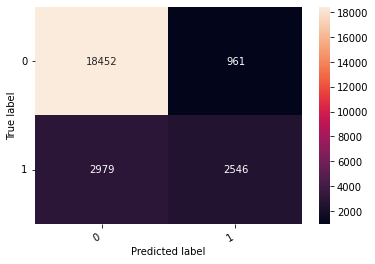

In [ ]:
hmap = sns.heatmap(cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');